In [1]:
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)

Loading required package: NLP
Loading required package: RColorBrewer


###### Test

In [2]:
data <- read.table(file="./Data-Processing/tweet.out", sep="\t", col.names=c('tweetID', 'userID', 'label', 'tweet'), header=F)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [ ]:
head(data)

In [11]:
text <- paste(data$tweet, collapse= "")

In [ ]:
nchar(text)

###### Real thing

In [31]:
filePath <- "./Data-Processing/tweet_label_0.out"
text <- readLines(filePath)

In [32]:
docs <- Corpus(VectorSource(text))

In [33]:
# Text Transformation
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")

In [34]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove your own stop word
# specify your stopwords as a character vector
docs <- tm_map(docs, removeWords, c("blabla1", "blabla2")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
# Text stemming
# docs <- tm_map(docs, stemDocument)

In [35]:
# Build a term-document matrix
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
can,can,613
prozac,prozac,568
lozenge,lozenge,468
cymbalta,cymbalta,464
chemical,chemical,397
vyvanse,vyvanse,372
just,just,364
take,take,356
like,like,353
humira,humira,350


##### ADR Present

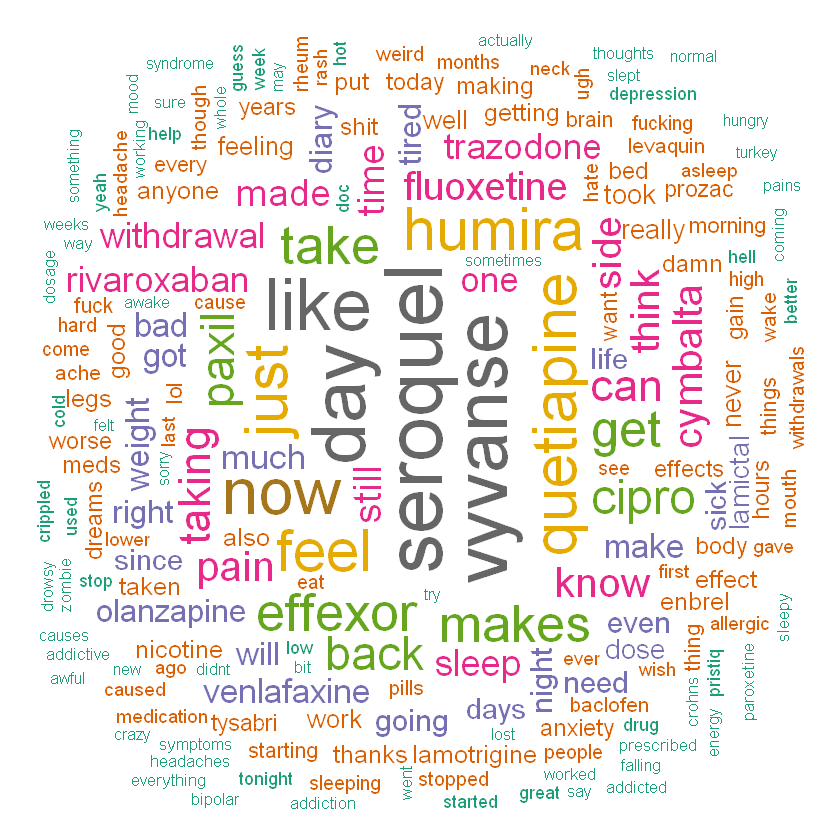

In [30]:
# Generate word cloud
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

##### ADR Absent

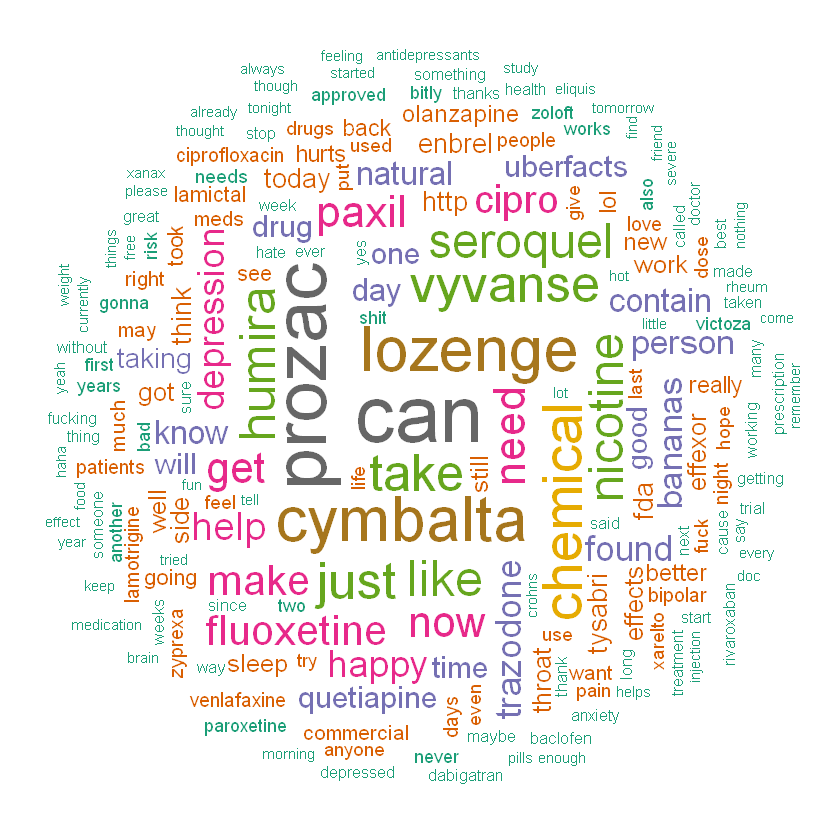

In [36]:
# Generate word cloud
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))